In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time
import webscraping

### Let's take a look at the top goal-scorers in the English Premier League (EPL)

In [3]:
#data collection
webscraping.get_premTopGoals()

In [7]:
#data cleaning
df = pd.read_csv("premTopGoals.csv")
df = df.head(n=10)
df = df.drop(columns=['Unnamed: 0', 'GS', 'MP', 'YC', 'RC'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'G':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(10):
    df.at[i, 'Name'] = df.at[i, 'Name'].split()[1].strip(',')
print(df)

         Name  Games  Goals  Assists  Shots on Goal  Total Shots
0      Aguero     24     18        6             33           90
1       Salah     28     17        6             47           94
2  Aubameyang     27     16        3             28           68
3        Kane     24     15        4             44           86
4        Mane     26     14        1             32           61
5   Lacazette     27     12        5             27           58
6      Hazard     26     12       10             31           67
7    Sterling     25     12        8             27           50
8  Sigurdsson     28     11        3             23           63
9       Pogba     25     11        9             42           81


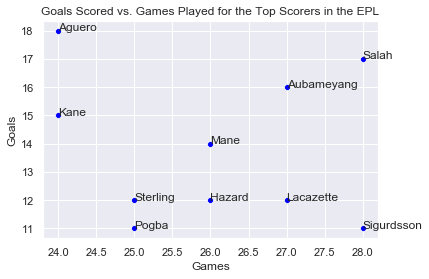

In [9]:
#visualization of top scorers
sns.set(style="darkgrid")
sns.set_palette("Dark2")
scatter = sns.scatterplot(x = "Games", y = "Goals", color = "blue", data = df)
scatter.set_title("Goals Scored vs. Games Played for the Top Scorers in the EPL")


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        scatter.text(point['x'], point['y'], str(point['val']))

label_point(df.Games, df.Goals, df.Name, scatter)
plt.show()

In [10]:
#create 2 new columns for shooting accuracy and coversion rate
#shooting accuracy is given by (shots on goal/total shots)*100%
#conversion rate is given by (goals/shots on goal)*100%
for i in range(10):
    df.at[i, 'Shooting Accuracy(%)'] = (df.at[i, 'Shots on Goal']/df.at[i, 'Total Shots'])*100
    df.at[i, 'Conversion Rate(%)'] = (df.at[i, 'Goals']/df.at[i, 'Shots on Goal'])*100
#print(df)

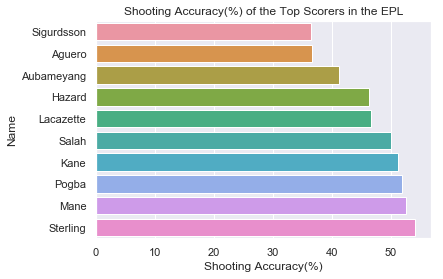

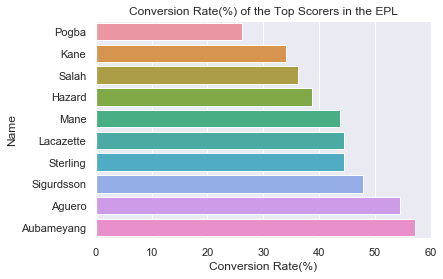

In [66]:
#visualization of top scorers' shooting accuracy and conversion rate
df1 = df.sort_values(['Shooting Accuracy(%)'])
bar1 = sns.barplot(x='Shooting Accuracy(%)', y='Name', data=df1)
plt.title('Shooting Accuracy(%) of the Top Scorers in the EPL')
plt.show()

df2 = df.sort_values(['Conversion Rate(%)'])
bar2 = sns.barplot(x='Conversion Rate(%)', y='Name', data=df2)
plt.title('Conversion Rate(%) of the Top Scorers in the EPL')
plt.show()